**INTEGRANTES EQUIPO 15**


*   David García Robles A01152606
*   Carlos M. Ramirez A01795036
*   Fernando Garcia Corona A01793717

In [34]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/MyDrive/data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
pip install scikit-surprise


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse.linalg import svds
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [37]:
# Cargar el conjunto de datos
df = pd.read_csv(DATA_PATH , encoding='unicode_escape')

In [38]:
# Mostrar las primeras filas del conjunto de datos
print("Primeras filas del conjunto de datos:")
print(df.head(10))

Primeras filas del conjunto de datos:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Ki

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [40]:
# Resumen estadístico del conjunto de datos
print("\nResumen estadístico del conjunto de datos:")
print(df.describe().round(2))


Resumen estadístico del conjunto de datos:
        Quantity  UnitPrice  CustomerID
count  541909.00  541909.00   406829.00
mean        9.55       4.61    15287.69
std       218.08      96.76     1713.60
min    -80995.00  -11062.06    12346.00
25%         1.00       1.25    13953.00
50%         3.00       2.08    15152.00
75%        10.00       4.13    16791.00
max     80995.00   38970.00    18287.00


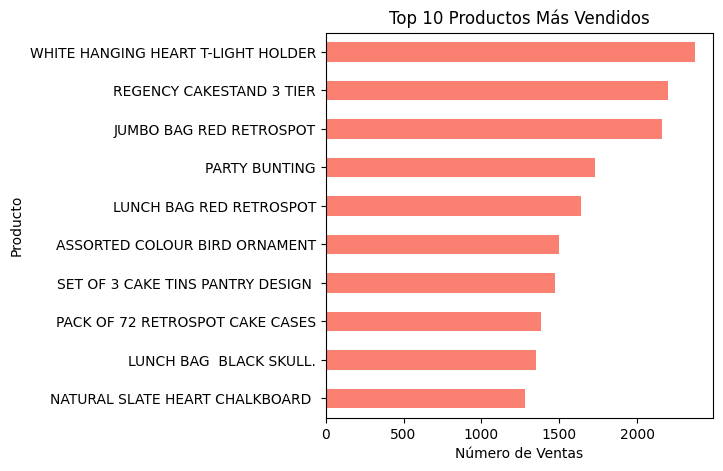

In [41]:
# Distribución de productos más vendidos
top_products = df['Description'].value_counts().head(10)
plt.figure(figsize=(5, 5))
top_products.plot(kind='barh', color='salmon')
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Número de Ventas')
plt.ylabel('Producto')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el producto más vendido en la parte superior
plt.show()

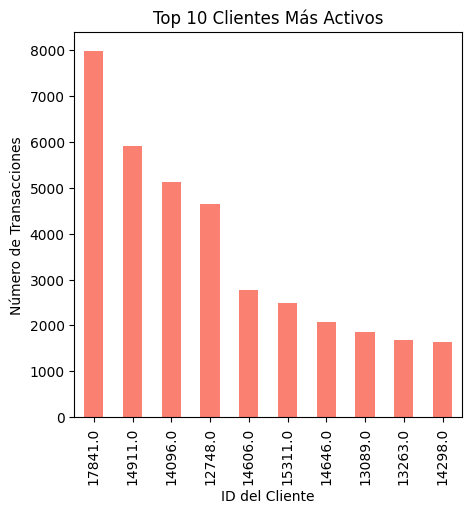

In [42]:
# Análisis de clientes más activos
active_customers = df.groupby('CustomerID')['InvoiceNo'].count().sort_values(ascending=False)
plt.figure(figsize=(5, 5))
active_customers.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Clientes Más Activos')
plt.xlabel('ID del Cliente')
plt.ylabel('Número de Transacciones')
plt.show()

In [43]:
# Filtrar columnas relevantes
data = df[['CustomerID', 'StockCode', 'Quantity', 'Description']]

# Remover filas con valores faltantes
data = data.dropna(subset=['CustomerID', 'StockCode', 'Quantity'])

# Filtrar datos para evitar ruido
data = data[data['Quantity'] > 0]  # Solo considerar transacciones con cantidad positiva

In [44]:
# Dividir los datos en conjuntos de entrenamiento y prueba
def train_test_split_data(data, test_size=0.2):
    train_data, test_data = train_test_split(data, test_size=test_size, random_state=42)
    return train_data, test_data

train_data, test_data = train_test_split_data(data)

In [45]:
# Crear matrices de interacción de entrenamiento y prueba
interaction_matrix_train = train_data.pivot_table(index='StockCode', columns='CustomerID', values='Quantity', fill_value=0)
interaction_matrix_test = test_data.pivot_table(index='StockCode', columns='CustomerID', values='Quantity', fill_value=0)

# Asegurarse de que las columnas (CustomerID) estén alineadas entre las matrices de entrenamiento y prueba
common_customers = interaction_matrix_train.columns.intersection(interaction_matrix_test.columns)
interaction_matrix_train = interaction_matrix_train[common_customers]
interaction_matrix_test = interaction_matrix_test[common_customers]

# Convertir la matriz de entrenamiento a numpy
interaction_matrix_train_numpy = interaction_matrix_train.to_numpy()

print("Matriz de Interacción de Entrenamiento:")
print(interaction_matrix_train)

print("\nMatriz de Interacción de Prueba:")
print(interaction_matrix_test)

# Imprimir la matriz de entrenamiento en formato numpy
print("\nMatriz de Entrenamiento en formato numpy:")
print(interaction_matrix_train_numpy)

Matriz de Interacción de Entrenamiento:
CustomerID  12347.0   12348.0  12349.0  12350.0  12352.0  12353.0  12354.0  \
StockCode                                                                    
10002           0.0  0.000000        0        0      0.0        0        0   
10080           0.0  0.000000        0        0      0.0        0        0   
10120           0.0  0.000000        0        0      0.0        0        0   
10123C          0.0  0.000000        0        0      0.0        0        0   
10124A          0.0  0.000000        0        0      0.0        0        0   
...             ...       ...      ...      ...      ...      ...      ...   
C2              0.0  0.000000        0        0      0.0        0        0   
DOT             0.0  0.000000        0        0      0.0        0        0   
M               0.0  0.000000        0        0      1.0        0        0   
PADS            0.0  0.000000        0        0      0.0        0        0   
POST            0.0  2.6

In [46]:
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [47]:
from sklearn.decomposition import TruncatedSVD
nc = min(interaction_matrix_train_numpy.shape) - 1
SVD_food = TruncatedSVD(n_components=nc)

# Medir el tiempo de entrenamiento
start_time = time.time()

SVD_food.fit(interaction_matrix_train_numpy)

training_time = time.time() - start_time

# Determinar la cantidad de componentes que explican el 90% de la variabilidad
explained_variance = np.cumsum(SVD_food.explained_variance_ratio_)
N_f = np.searchsorted(explained_variance, 0.90)

print('Total de valores singulares basados en evaluación de la variabilidad:', nc)
print('Valor de truncamiento al 90% de dicha variabilidad:', N_f)

Total de valores singulares basados en evaluación de la variabilidad: 3616
Valor de truncamiento al 90% de dicha variabilidad: 165


In [48]:
# Elegir el número de factores latentes
k = 50                #El RMSE más bajo con un menor número de factores latentes (k=50 vs k=165) sugiere que un modelo más simple puede estar generalizando mejor a los datos de prueba

# Realizar la descomposición SVD con la matriz de entrenamiento
U_train, sigma_train, Vt_train = svds(interaction_matrix_train_numpy, k=k)
sigma_train = np.diag(sigma_train)

# Recomponer la matriz de predicciones
predicted_interactions_train = np.dot(np.dot(U_train, sigma_train), Vt_train)

# Convertir las predicciones a un DataFrame
predicted_interactions_train_df = pd.DataFrame(predicted_interactions_train, index=interaction_matrix_train.index, columns=interaction_matrix_train.columns)

# Crear un diccionario para mapear StockCode a Description
item_descriptions = data[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')['Description'].to_dict()

# Función para obtener las mejores recomendaciones
def get_top_n_recommendations(user_id, interaction_matrix, predicted_interactions_df, item_descriptions, n=10):
    # Obtener los productos que el usuario ya ha interactuado
    user_interactions = interaction_matrix[user_id]

    # Filtrar productos ya interactuados
    user_predictions = predicted_interactions_df[user_id]
    recommendations = user_predictions[user_interactions == 0]

    # Ordenar las predicciones por la calificación estimada en orden descendente
    top_n_recommendations = recommendations.sort_values(ascending=False).head(n)

    return top_n_recommendations


In [53]:
# Función para calcular RMSE
def compute_rmse(predictions, true_values):
    # Alinear matrices
    common_index = predictions.index.intersection(true_values.index)
    predictions_aligned = predictions.loc[common_index]
    true_values_aligned = true_values.loc[common_index]

    common_columns = predictions_aligned.columns.intersection(true_values_aligned.columns)
    predictions_aligned = predictions_aligned[common_columns]
    true_values_aligned = true_values_aligned[common_columns]

    rmse = np.sqrt(mean_squared_error(true_values_aligned, predictions_aligned))
    return rmse

def compute_mae(predictions, true_values):
    # Alinear matrices
    common_index = predictions.index.intersection(true_values.index)
    predictions_aligned = predictions.loc[common_index]
    true_values_aligned = true_values.loc[common_index]

    common_columns = predictions_aligned.columns.intersection(true_values_aligned.columns)
    predictions_aligned = predictions_aligned[common_columns]
    true_values_aligned = true_values_aligned[common_columns]

    mae = mean_absolute_error(true_values_aligned, predictions_aligned)
    return mae

# Evaluar RMSE en el conjunto de prueba
rmse_test = compute_rmse(predicted_interactions_train_df, interaction_matrix_test)
mae_test = compute_mae(predicted_interactions_train_df, interaction_matrix_test)
print(f"RMSE en el conjunto de prueba: {rmse_test}")

# Función para calcular Precision@K
def precision_at_k(predicted_interactions_df, true_interactions_df, k=10):
    precisions = []

    for user in true_interactions_df.columns:
        # Obtener las K mejores predicciones para el usuario
        user_predictions = predicted_interactions_df[user].sort_values(ascending=False).head(k)
        user_true_values = true_interactions_df[user]

        # Contar los elementos relevantes entre las K mejores predicciones
        relevant_items = user_true_values[user_true_values > 0].index
        recommended_relevant_items = [item for item in user_predictions.index if item in relevant_items]

        # Calcular precisión
        precisions.append(len(recommended_relevant_items) / k)

    # Promediar las precisiones de todos los usuarios
    precision = np.mean(precisions)
    return precision

def recall_at_k(predicted_interactions_df, true_interactions_df, k=10):
    recalls = []

    for user in true_interactions_df.columns:
        # Obtener las K mejores predicciones para el usuario
        user_predictions = predicted_interactions_df[user].sort_values(ascending=False).head(k)
        user_true_values = true_interactions_df[user]

        # Obtener los elementos relevantes en los valores verdaderos
        relevant_items = user_true_values[user_true_values > 0].index
        recommended_relevant_items = [item for item in user_predictions.index if item in relevant_items]

        # Calcular recall
        if len(relevant_items) > 0:
            recalls.append(len(recommended_relevant_items) / len(relevant_items))

    # Promediar los recalls de todos los usuarios
    recall = np.mean(recalls)
    return recall

# Evaluar Precision@K en el conjunto de prueba
precision_test = precision_at_k(predicted_interactions_train_df, interaction_matrix_test, k=10)
recall_test = precision_at_k(predicted_interactions_train_df, interaction_matrix_test, k=10)
print(f"Precision@10 en el conjunto de prueba: {precision_test}")

RMSE en el conjunto de prueba: 3.8581183425387775
Precision@10 en el conjunto de prueba: 0.06375921375921376


In [50]:
def make_recommendation(userID):
  # Obtener las recomendaciones
  top_n_recommendations = get_top_n_recommendations(userID, interaction_matrix_train, predicted_interactions_train_df, item_descriptions, n=10)
  print("Top 10 Recomendaciones:")

  # Mostrar las recomendaciones con la descripción del producto
  for item in top_n_recommendations.index:
      description = item_descriptions.get(item, "Descripción no disponible")
      print(f"Producto ID: {item}, Nombre: {description}")

In [51]:
make_recommendation(13047)

Top 10 Recomendaciones:
Producto ID: 22998, Nombre: TRAVEL CARD WALLET KEEP CALM
Producto ID: 22197, Nombre: POPCORN HOLDER
Producto ID: 22992, Nombre: REVOLVER WOODEN RULER 
Producto ID: 22991, Nombre: GIRAFFE WOODEN RULER
Producto ID: 23230, Nombre: WRAP ALPHABET DESIGN
Producto ID: 21495, Nombre: SKULLS AND CROSSBONES WRAP
Producto ID: 23232, Nombre: WRAP VINTAGE LEAF DESIGN
Producto ID: 23084, Nombre: RABBIT NIGHT LIGHT
Producto ID: 21915, Nombre: RED  HARMONICA IN BOX 
Producto ID: 23207, Nombre: LUNCH BAG ALPHABET DESIGN


In [52]:
make_recommendation(17850)

Top 10 Recomendaciones:
Producto ID: 21175, Nombre: GIN AND TONIC DIET METAL SIGN
Producto ID: 21108, Nombre: FAIRY CAKE FLANNEL ASSORTED COLOUR
Producto ID: 22865, Nombre: HAND WARMER OWL DESIGN
Producto ID: 84945, Nombre: MULTI COLOUR SILVER T-LIGHT HOLDER
Producto ID: 85099B, Nombre: JUMBO BAG RED RETROSPOT
Producto ID: 47556B, Nombre: TEA TIME TEA TOWELS 
Producto ID: 22178, Nombre: VICTORIAN GLASS HANGING T-LIGHT
Producto ID: 84755, Nombre: COLOUR GLASS T-LIGHT HOLDER HANGING
Producto ID: 22866, Nombre: HAND WARMER SCOTTY DOG DESIGN
Producto ID: 21497, Nombre: FANCY FONTS BIRTHDAY WRAP


# `Métricas`

In [54]:

# Imprimir resultados
print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"Precisión: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")

Tiempo de entrenamiento: 170.66 segundos
RMSE: 3.8581
MAE: 0.2806
Precisión: 0.0638
Recall: 0.0638
